In [1]:
import os
os.chdir('../')
import numpy as np
import pandas as pd
import torch
import torch.nn as nn

from utils.amenities import AmenitiesClustering
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split
from dataset.dataloader import Dataloader



[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mangelini/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/mangelini/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/mangelini/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mangelini/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/mangelini/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# import label_encoder to use it for the categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [3]:
# 'listings_comments.csv is the datset compined 

# reaf the datset from Google Drive G:\.shortcut-targets-by-id\1CZZx9Bpz7hB-BhPFsqAL3fRVyxM1XfwF\AirBnB_project
# data = pd.read_csv('G:\\.shortcut-targets-by-id\\1CZZx9Bpz7hB-BhPFsqAL3fRVyxM1XfwF\\AirBnB_project\\listings_comments.csv')
DATASET_PATH = f'dataset'

data = Dataloader(
    listing_path = f'{DATASET_PATH}/listings',
    comments_path = f'{DATASET_PATH}/comments',
)
data = data.getListings()



In [4]:
data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data.sample(2)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
5256,579392653502749270,https://www.airbnb.com/rooms/579392653502749270,20230309202119,2023-03-10,previous scrape,Lovely apartment with spacious private rooftop,Cozy and light apartment located in Amsterdam'...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,36868182,https://www.airbnb.com/users/show/36868182,Bas,2015-06-27,"Amsterdam, Netherlands",NaN,a few days or more,0%,44%,f,https://a0.muscache.com/im/pictures/user/3bdb6...,https://a0.muscache.com/im/pictures/user/3bdb6...,NaN,1,1,"['email', 'phone']",t,t,NaN,De Baarsjes - Oud-West,NaN,52.363050,4.86461,Entire loft,Entire home/apt,2,NaN,1.5 baths,1.0,1.0,"[""Outdoor dining area"", ""Carbon monoxide alarm...",$225.00,6,365,6,6,365,365,6.0,365.0,NaN,t,0,0,0,0,2023-03-10,2,2,0,2022-05-16,2022-06-06,5.0,5.0,4.0,5.0,5.0,4.5,5.0,0363 143D 334F 1FB2 A265,f,1,1,0,0,0.20
5698,659273083479610772,https://www.airbnb.com/rooms/659273083479610772,20230309202119,2023-03-10,city scrape,Charming 1-bedroom condo in the heart of the city,My flat is located in a vibrant and central ne...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,324873771,https://www.airbnb.com/users/show/324873771,Melis,2020-01-06,NaN,NaN,NaN,NaN,40%,f,https://a0.muscache.com/im/pictures/user/35ea4...,https://a0.muscache.com/im/pictures/user/35ea4...,NaN,1,1,"['email', 'phone']",t,t,NaN,De Pijp - Rivierenbuurt,NaN,52.343109,4.90741,Entire condo,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Shared hot tub"", ""Drying rack for clothing"",...",$311.00,2,365,2,2,365,365,2.0,365.0,NaN,t,20,20,20,20,2023-03-10,2,2,0,2022-09-11,2022-10-01,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0363 8863 A9F6 C3D3 8AAC,f,1,1,0,0,0.33


In [6]:
data.shape

(6998, 75)

# Base Preperation

## Remove unnecessary columns

In [7]:
len(data.columns)

75

In [8]:
# Crate a list for removing unnecessary columns from the dataset
ignored_conlumns = ['id', 'listing_url', 'scrape_id', 'last_scraped', 'source','picture_url', 'host_id',
       'host_url','host_name','host_location','host_thumbnail_url', 'host_picture_url','host_verifications','neighbourhood_group_cleansed','latitude',
       'longitude','bathrooms','calendar_updated','has_availability','availability_30', 'availability_60', 'availability_90',
       'availability_365','calendar_last_scraped', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','instant_bookable',
       'calculated_host_listings_count','license']

In [9]:
# Remove the unnecessary columns from the dataset.
data.drop(ignored_conlumns, axis=1, inplace=True)
len(data.columns)

42

## Check and replace nan values


In [10]:
def fill_nan(df, column):
    if(df[column].astype(str).str.isnumeric().all()==True):
        #Numeric values
        df[column].fillna(df[column].mean(), inplace=True)
    else:
        #string balue
        df[column].fillna('UNK', inplace=True)

    return df

for columnName in data.columns:
    data = fill_nan(data, columnName)

# Column processing

## Function that takes a column and returns an embeddings matrix

In [11]:
# Check the number of unique values in each column
data.nunique()


name                                            6903
description                                     6894
neighborhood_overview                           4136
host_since                                      2734
host_about                                      3378
host_response_time                                 5
host_response_rate                                57
host_acceptance_rate                              97
host_is_superhost                                  3
host_neighbourhood                                58
host_listings_count                               30
host_total_listings_count                         45
host_has_profile_pic                               2
host_identity_verified                             2
neighbourhood                                     51
neighbourhood_cleansed                            22
property_type                                     58
room_type                                          4
accommodates                                  

In [12]:
# load the model that is responsible for the text embeddings
model = SentenceTransformer('distiluse-base-multilingual-cased-v2')

# create a device object
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Device: {device}')
# move the model to the device
model.to(device)

# parallelize the model across multiple GPUs(if available)
model = nn.DataParallel(model)

underlying_model = model.module

Device: cuda


In [13]:
# function to get the embeddings for a column in a dataframe and return them as a numpy array
def get_embeddings(dataframe, column_name, batch_size=100):
    """
    Obtain sentence embeddings for a dataframe column using SentenceTransformer with batch processing.

    Args:
        dataframe (pandas.DataFrame): The dataframe containing the column to obtain embeddings for.
        column_name (str): The name of the column to obtain embeddings for.
        batch_size (int, optional): The size of each batch to process. Default is 100.

    Returns:
        numpy.ndarray: A numpy array containing the embeddings for the specified column.
    """

    # Obtain the embeddings for the specified column in batches
    num_batches = int(np.ceil(len(dataframe) / batch_size))
    embeddings = []
    for i in range(num_batches):
        start_index = i * batch_size
        end_index = min(start_index + batch_size, len(dataframe))
        batch_embeddings = model.encode(dataframe[column_name][start_index:end_index].tolist())
        embeddings.append(batch_embeddings)
    embeddings = np.concatenate(embeddings)

    return embeddings

In [14]:
processedColumns = pd.DataFrame()

## Text Columns - word embedings

For columns that have text values in them we have decided to embed the text using the following model: SentenceTransformer('distiluse-base-multilingual-cased-v2')

From that model we recieved teh word emebdings which are then placed into teh data frame for later use in the PCA analysis.
In this case we decided to keep the embedding conlums separated


### neighborhood_overview

In [15]:
#Get the word encodings for the text in the column
neighborhood_overview_embeddings = underlying_model.encode(data.neighborhood_overview.values)


In [16]:
# Convert embeddings to a DataFrame with string column names
processedColumnsNeighborhoodOverview = pd.DataFrame(neighborhood_overview_embeddings, columns=[f'neighborhood_overview_embeddings{i+1}' for i in range(neighborhood_overview_embeddings.shape[1])])

### host_about

In [17]:
#Get the word encodings for the text in the column
host_about_embeddings = underlying_model.encode(data.host_about)

In [18]:
# Convert embeddings to a DataFrame with string column names
processedColumnsHostAbout = pd.DataFrame(host_about_embeddings, columns=[f'host_about_embeddings{i+1}' for i in range(host_about_embeddings.shape[1])])

### name

In [19]:
#Get the word encodings for the text in the column
name_embeddings = underlying_model.encode(data.name)

In [20]:
# Convert embeddings to a DataFrame with string column names
processedColumnsName = pd.DataFrame(name_embeddings, columns=[f'name_embeddings{i+1}' for i in range(name_embeddings.shape[1])])

### description

In [21]:
#Get the word encodings for the text in the column
description_embeddings = underlying_model.encode(data.description)

In [22]:
# Convert embeddings to a DataFrame with string column names
processedColumnsDescription = pd.DataFrame(description_embeddings, columns=[f'description_embeddings{i+1}' for i in range(description_embeddings.shape[1])])

### bathroom_text

In [23]:
data.bathrooms_text.sample(5)

4903    1 bath
6997    1 bath
3181    1 bath
5868    1 bath
5467    1 bath
Name: bathrooms_text, dtype: object

In [24]:
import re

def extract_number(string):
    pattern = r'^(\d+(?:\.\d+)?)' # regular expression pattern to match the number at the start of the string
    match = re.match(pattern, string)
    if match:
        return float(match.group(1))
    else:
        return None
#Extract the number of bathrooms from the text example: 1.2 bathrooms > 1.2
numberOfBathrooms = data.bathrooms_text.apply(extract_number)
numberOfBathrooms.sample(5)

1656    1.0
897     1.0
229     3.0
951     2.0
4967    1.0
Name: bathrooms_text, dtype: float64

In [25]:
processedColumns['bathrooms_text']=numberOfBathrooms
processedColumns.sample(5).bathrooms_text

5275    1.0
2600    1.0
2262    1.0
4571    1.5
3814    1.0
Name: bathrooms_text, dtype: float64

### price

In [26]:
data.price.sample(5)

3733    $200.00
6456    $129.00
6300    $240.00
5308    $188.00
57      $140.00
Name: price, dtype: object

In [27]:
processedColumns['price'] = data.price.apply(lambda p: float(p.replace("$", "").replace(",", "")))


## Categorical Columns - label encoding

For columns that have categorical columns we have decided to label encde them using the function le.fit_transform() using the LabelEncoder class from sklearn.preprocessing.

Outputs of the label encoding we saved in the processedColumns dataframe which we then later used in PCA analysis.

### host_response_time

In [28]:
#Get the label encoding for the categorical column
encoding = le.fit_transform(data.host_response_time)


In [29]:
# Save the label encoding into the main pandas dataframe for later processing
processedColumns['host_response_time']=encoding
processedColumns.sample(5)

,bathrooms_text,price,host_response_time
3084,1.0,200.0,3
126,1.5,250.0,2
676,1.5,150.0,0
3106,1.0,371.0,4
1167,1.0,250.0,2


### host_response_rate

In [30]:
processedColumns['host_response_rate'] = data.host_response_rate.apply(lambda rt: 0.0 if pd.isnull(rt) or rt=='UNK' else float(rt.replace("%", "")))
processedColumns.sample(5)

,bathrooms_text,price,host_response_time,host_response_rate
2059,1.5,60.0,0,0.0
6085,1.0,300.0,2,100.0
6963,1.5,350.0,4,100.0
5037,1.0,289.0,4,100.0
2180,2.0,200.0,0,0.0


### host_acceptance_rate

In [31]:
processedColumns['host_acceptance_rate']= data.host_acceptance_rate.apply(lambda rt: 0.0 if pd.isnull(rt) or rt=='UNK' else float(rt.replace("%", "")))
processedColumns.sample(5)

,bathrooms_text,price,host_response_time,host_response_rate,host_acceptance_rate
2856,1.5,240.0,0,0.0,0.0
4016,1.0,150.0,2,100.0,100.0
748,1.0,130.0,0,0.0,0.0
4980,1.0,250.0,4,75.0,94.0
5733,3.0,695.0,3,100.0,100.0


### host_is_superhost

In [32]:
encoding = le.fit_transform(data.host_is_superhost)

In [33]:
processedColumns['host_is_superhost']=encoding
processedColumns.sample(5).host_is_superhost

3294    1
4738    1
3077    1
2618    1
5786    1
Name: host_is_superhost, dtype: int64

### host_neighbourhood

In [34]:
data.host_neighbourhood.value_counts()

host_neighbourhood
UNK                                    4022
Oud-West                                553
Grachtengordel                          244
De Pijp                                 234
Jordaan                                 189
Oosterparkbuurt                         157
Bos en Lommer                           126
Indische Buurt                          116
Oost                                     84
Nieuwmarkt en Lastage                    79
Rivierenbuurt                            78
Hoofddorppleinbuurt                      69
Watergraafsmeer                          64
De Wallen                                62
Westelijke Eilanden                      57
Oostelijke Eilanden en Kadijken          57
Amsterdam Centrum                        56
Weesperbuurt en Plantage                 55
Frederik Hendrikbuurt                    53
Zeeburg                                  52
Oud-Zuid                                 50
Stadionbuurt                             45
Spaarndammer 

In [35]:
vc = data.host_neighbourhood.value_counts()
single_neighborhoods = vc[vc == 1].index.tolist()

data.loc[data['host_neighbourhood'].isin(single_neighborhoods), 'host_neighbourhood'] = 'other'

single_neighborhoods

['LB of Islington',
 'Grand Place',
 'Merkaz HaIr',
 'Belváros',
 'Sant Antoni',
 'Stockwell',
 'El Raval',
 'La Combe',
 'Nieuwendammerham',
 'La Sagrada Família',
 'Palermo Hollywood',
 'Cannaregio',
 'Urbanización Galera la III']

In [36]:
data.host_neighbourhood.value_counts().tail(5)

host_neighbourhood
Landelijk Noord                        11
Tuindorp Nieuwendam                     8
Buitenveldert-Oost                      6
Glòries - El Parc                       6
Nieuwendammerdijk en Buiksloterdijk     4
Name: count, dtype: int64

In [ ]:
encoding = le.fit_transform(data.host_neighbourhood)
processedColumns['host_neighbourhood']=encoding
processedColumns.host_neighbourhood

### host_has_profile_pic

In [38]:
encoding = le.fit_transform(data.host_has_profile_pic)
processedColumns['host_has_profile_pic']=encoding
processedColumns.sample(5).host_has_profile_pic

3413    1
4651    1
4251    1
3185    1
6512    1
Name: host_has_profile_pic, dtype: int64

### host_identity_verified

In [39]:
encoding = le.fit_transform(data.host_identity_verified)
processedColumns['host_identity_verified']=encoding
processedColumns.sample(5).host_identity_verified

1336    1
2232    1
3741    0
2036    1
748     1
Name: host_identity_verified, dtype: int64

### neighbourhood_cleansed

In [40]:
data.neighbourhood_cleansed.value_counts().tail(5)

neighbourhood_cleansed
De Aker - Nieuw Sloten    49
Bijlmer-Centrum           44
Gaasperdam - Driemond     44
Osdorp                    43
Bijlmer-Oost              28
Name: count, dtype: int64

In [41]:
encoding = le.fit_transform(data.neighbourhood_cleansed)
processedColumns['neighbourhood_cleansed']=encoding
processedColumns.sample(5).neighbourhood_cleansed

4730    7
5986    7
1424    8
1444    2
5867    7
Name: neighbourhood_cleansed, dtype: int64

### property_type

In [42]:
encoding = le.fit_transform(data.property_type)
processedColumns['property_type']=encoding
processedColumns.sample(5).property_type

1533    14
637     11
5524    14
6865    14
1823    14
Name: property_type, dtype: int64

### room_type

In [43]:
encoding = le.fit_transform(data.room_type)
processedColumns['room_type']=encoding
processedColumns.sample(5).room_type

928     2
6410    0
5781    0
5355    0
2657    0
Name: room_type, dtype: int64

## Numerical/date Columns - converted to regular numbers

Columns that already have numerical values did not need any encoding here we only checked if any values are type of string "UNK" if so we replaced it. Besides just numbers we also processed date columns and replace the date with a time value which is in number format.

### host_since

In [44]:
from datetime import date
from datetime import datetime

#Get the dates from the dataframe
datetest =data.host_since.apply(lambda x: datetime.strptime(x, '%Y-%m-%d').date())

#Convert dates to number
time = datetest.apply(lambda x: x.toordinal())

#Save the number to the data frame
processedColumns['host_since']= pd.Series(time.tolist())

#Print the change
processedColumns.sample(5).host_since

1047    735286
6195    738425
5283    734934
3479    737145
3426    734591
Name: host_since, dtype: int64

### host_listings_count

In [45]:
#Save the number that doesnt need to be changed into the processed columns dataframe for later processing
processedColumns['host_listings_count']= data.host_listings_count
processedColumns.sample(5).host_listings_count

3701    1
4513    1
2331    2
5099    1
2254    1
Name: host_listings_count, dtype: int64

### bedrooms

In [46]:
#Replace any occurances of "UNK" with number 0 since all values have to be int for PCA
withoutNa = data.bedrooms.replace("UNK",0)

#Make sure all values are type of float
processedColumns["bedrooms"]=withoutNa.astype(float)

#Vizualize
processedColumns.sample(5).bedrooms

6282    1.0
3648    2.0
5197    1.0
6010    3.0
6218    1.0
Name: bedrooms, dtype: float64

### beds

In [47]:
#Replace any occurances of "UNK" with number 0 since all values have to be int for PCA
withoutNa=data.beds.replace('UNK', 0)

#Make sure all values are of type float
processedColumns["beds"]=withoutNa.astype(float)

#Vizualize
processedColumns.sample(5).beds

6079    2.0
3217    2.0
1729    2.0
6792    2.0
6820    2.0
Name: beds, dtype: float64

### host_total_listings_count

In [48]:

processedColumns['host_total_listings_count']= data.host_total_listings_count
processedColumns.sample(5).host_total_listings_count

5794    2
6141    6
2902    2
6135    1
650     2
Name: host_total_listings_count, dtype: int64

### accommodates

In [49]:
processedColumns['accommodates']= data.accommodates
processedColumns.sample(5).accommodates

820     4
33      2
6194    2
3423    2
2282    2
Name: accommodates, dtype: int64

### minimum_nights

In [50]:
processedColumns['minimum_nights']= data.minimum_nights
processedColumns.sample(5).minimum_nights

5110    2
2548    1
5107    6
3734    2
1327    4
Name: minimum_nights, dtype: int64

### maximum_nights

In [51]:
processedColumns['maximum_nights']= data.maximum_nights
processedColumns.sample(5).maximum_nights

3965    1125
4124      99
1901    1125
406     1125
811       30
Name: maximum_nights, dtype: int64

### minimum_minimum_nights

In [52]:
processedColumns['minimum_minimum_nights']= data.minimum_minimum_nights
processedColumns.sample(5).minimum_minimum_nights

2988    3
6298    3
1361    2
2454    1
4431    2
Name: minimum_minimum_nights, dtype: int64

### maximum_minimum_nights

In [53]:
processedColumns['maximum_minimum_nights']= data.maximum_minimum_nights
processedColumns.sample(5).maximum_minimum_nights

4470    2
5977    7
3933    1
5379    3
4843    3
Name: maximum_minimum_nights, dtype: int64

### minimum_maximum_nights

In [54]:
processedColumns['minimum_maximum_nights']= data.minimum_maximum_nights
processedColumns.sample(5).minimum_maximum_nights

3902    1125
2537    1125
6746      30
3262    1125
3120    1125
Name: minimum_maximum_nights, dtype: int64

### maximum_maximum_nights

In [55]:
processedColumns['maximum_maximum_nights']= data.maximum_maximum_nights
processedColumns.sample(5).maximum_maximum_nights

6754     365
5193      30
2364      12
5721     365
3047    1125
Name: maximum_maximum_nights, dtype: int64

### minimum_nights_avg_ntm

In [56]:
processedColumns['minimum_nights_avg_ntm']= data.minimum_nights_avg_ntm
processedColumns.sample(5).minimum_nights_avg_ntm

6883    1.0
2735    5.0
6282    2.3
1055    3.0
808     2.7
Name: minimum_nights_avg_ntm, dtype: float64

### maximum_nights_avg_ntm

In [57]:
processedColumns['maximum_nights_avg_ntm']= data.maximum_nights_avg_ntm
processedColumns.sample(5).maximum_nights_avg_ntm

5706    1001.0
2354    1125.0
6628      26.0
6240    1125.0
3502    1125.0
Name: maximum_nights_avg_ntm, dtype: float64

### number_of_reviews

In [58]:
processedColumns['number_of_reviews']= data.number_of_reviews
processedColumns.sample(5).number_of_reviews

2266    172
4561     54
5277      2
3149     19
1641      2
Name: number_of_reviews, dtype: int64

### number_of_reviews_l30d

In [59]:
processedColumns['number_of_reviews_l30d']= data.number_of_reviews_l30d
processedColumns.sample(5).number_of_reviews_l30d

4352    0
2624    5
2897    0
6939    0
4142    0
Name: number_of_reviews_l30d, dtype: int64

### first_review

In [60]:
data.first_review.sample(5)

6919           UNK
6414    2023-01-04
931     2015-07-30
2978    2018-08-26
5593    2022-07-10
Name: first_review, dtype: object

In [61]:
timeData = data['first_review'].apply(lambda x: pd.Timestamp(x).toordinal() if x != 'UNK' else 0)
processedColumns['first_review']= pd.Series(timeData.tolist())
processedColumns.sample(5).first_review

6767    738547
4744    738303
5795    738378
2396    738414
5097    738523
Name: first_review, dtype: int64

### last_review


In [62]:
timeData = data['last_review'].apply(lambda x: pd.Timestamp(x).toordinal() if x != 'UNK' else 0)
processedColumns['last_review']= pd.Series(timeData.tolist())
processedColumns.sample(5).last_review

5295    738450
4516    738460
5532    738529
3247    737472
191     737436
Name: last_review, dtype: int64

### calculated_host_listings_count_entire_homes

In [63]:
processedColumns['calculated_host_listings_count_entire_homes']= data.calculated_host_listings_count_entire_homes
processedColumns.sample(5).calculated_host_listings_count_entire_homes

6138    1
2863    0
6343    1
6404    1
995     1
Name: calculated_host_listings_count_entire_homes, dtype: int64

### calculated_host_listings_count_private_rooms

In [64]:
processedColumns['calculated_host_listings_count_private_rooms']= data.calculated_host_listings_count_private_rooms
processedColumns.sample(5).calculated_host_listings_count_private_rooms

405     0
1497    2
2568    1
6181    2
5439    1
Name: calculated_host_listings_count_private_rooms, dtype: int64

### calculated_host_listings_count_shared_rooms

In [65]:
processedColumns['calculated_host_listings_count_shared_rooms']= data.calculated_host_listings_count_shared_rooms
processedColumns.sample(5).calculated_host_listings_count_shared_rooms

5105    0
1267    0
2894    0
1972    0
4761    0
Name: calculated_host_listings_count_shared_rooms, dtype: int64

### reviews_per_month

In [66]:
withoutUNK = data.reviews_per_month.replace('UNK', 0)
processedColumns['reviews_per_month']= withoutUNK.astype(float)
processedColumns.sample(5).reviews_per_month

4050    0.71
634     0.50
5521    1.05
6196    0.51
5156    0.00
Name: reviews_per_month, dtype: float64

## Amenities

In [67]:
# Here we extract a set of cluster that rapresent generic common amenities as kicktcen or tv
# then we check all the amenity of each listing if thwy have amenities embeddinbgs near the cluster to check for the presence
# see utils/amenities.py
amenitiesClusteringModel = AmenitiesClustering()
amenity_presences = amenitiesClusteringModel.fit_transform(data)
amenity_presences_conlumns = pd.DataFrame(amenity_presences, columns=[f'amenity_{i+1}' for i in range(len(amenity_presences[0]))])
processedColumns = pd.concat([processedColumns, amenity_presences_conlumns], axis=1)


6998it [00:09, 740.29it/s]
/home/mangelini/miniconda3/envs/NLP/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/mangelini/miniconda3/envs/NLP/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [68]:
# check if no row have ben removed for error
print(processedColumnsName.shape)
print(processedColumnsDescription.shape)
print(processedColumnsHostAbout.shape)
print(processedColumnsNeighborhoodOverview.shape)
print(processedColumns.shape)

(6998, 512)
(6998, 512)
(6998, 512)
(6998, 512)
(6998, 146)


## Saving results

In [69]:
import pickle
# Pickle embedded text fields
with open('embeddings/listing_name_embeddings.pkl', 'wb') as f:
    pickle.dump(processedColumnsName, f)

with open('embeddings/listing_description_embeddings.pkl', 'wb') as f:
     pickle.dump(processedColumnsDescription, f)

with open('embeddings/listing_host_about_embeddings.pkl', 'wb') as f:
    pickle.dump(processedColumnsHostAbout, f)

with open('embeddings/listing_neighborhood_overview_embeddings.pkl', 'wb') as f:
    pickle.dump(processedColumnsNeighborhoodOverview, f)

# other fields
with open('embeddings/listing_processed_data.pkl', 'wb') as f:
    pickle.dump(processedColumns, f)


# PCA

PCA Analysis is done on the processedColumns data frame. Before performing PCA we made sure that there are no NA values and we also scaled the data before using, will be redone later on each evalution this will allow us to test different PCA sizes easily!

In [77]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#processedColumns.dropna(inplace=True)

# Convert column names to strings
processedColumns.columns = processedColumns.columns.astype(str)

# instantiate a StandardScaler object
scaler = StandardScaler()

# scale the data
scaled_processedColumns = scaler.fit_transform(processedColumns[processedColumns.fillna(0).astype(float)])

# Create a PCA object with 2 components
pca = PCA(n_components=2)

# Fit and transform the data to 2 principal components
principal_components = pca.fit_transform(scaled_processedColumns)

# Convert principal components to a DataFrame with string column names
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Concatenate the principal components with the original data
result_df = pd.concat([principal_df, processedColumns], axis=1)

# Print the explained variance ratio of the 2 components
print(pca.explained_variance_ratio_)
print("___")
print(principal_df)

ValueError: Boolean array expected for the condition, not float64

# Vizualization

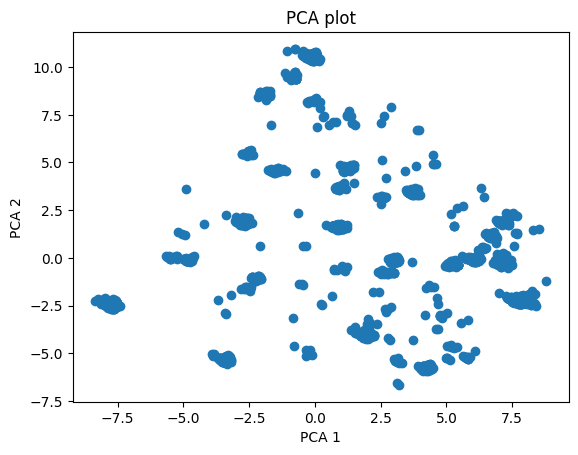

In [ ]:
import matplotlib.pyplot as plt

# Plot PCA data
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA plot')
plt.show()

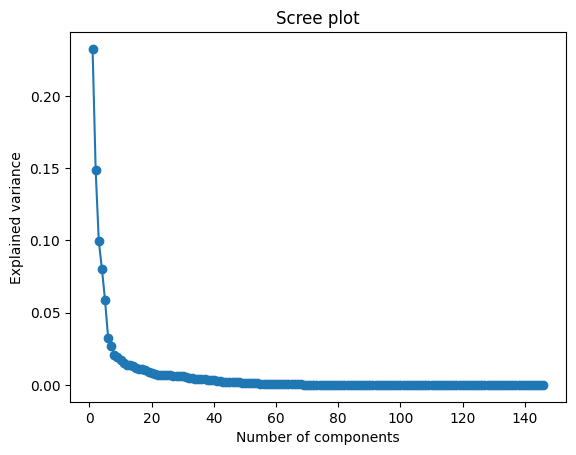

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Initialize PCA model
pca = PCA()

# Fit data
pca.fit(scaled_processedColumns)

# Scree plot
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, 'o-')
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.title('Scree plot')
plt.show()


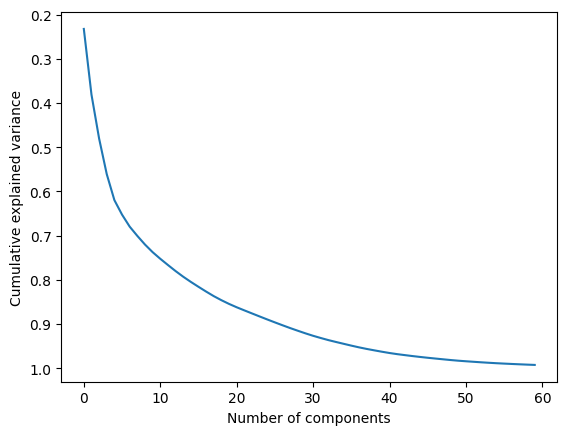

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# assume X is your data matrix with 1200 features
pca = PCA(n_components=60)
pca.fit(scaled_processedColumns)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.gca().invert_yaxis()
plt.show()
